In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [2]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Complete data on age and cabin not given (ignoring this for embarked as only 2 entries missing)
Filling missing age entries with median value

In [3]:
train_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [4]:
#In the cabin column we need to extract the first letter of the cabin and replace the NaN values with "N"
train_data["Cabin"] = train_data["Cabin"].fillna("N")
train_data["Cabin"] = train_data["Cabin"].apply(lambda x: x[0])
#use one hot encoder to encode the cabin column
train_data = pd.get_dummies(train_data, columns=["Cabin"], prefix="Cabin")
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Cabin_A  Cabin_B  Cabin_C  \
0      0         A/5 21171   7.2500        S        0        0        0   
1      0          PC 17599  71.2833        C        0        0        1   
2      0  STON/O2. 3101282   7.9250        S        0        0        0   
3      0            

ASSUMPTION : Higher the cabin, greater the lieklihood of survival

In [5]:
#fill the missing values in the age column with the median age
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())


In [6]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Cabin_A  Cabin_B  Cabin_C  \
0      0         A/5 21171   7.2500        S        0        0        0   
1      0          PC 17599  71.2833        C        0        0        1   
2      0  STON/O2. 3101282   7.9250        S        0        0        0   
3      0            

In [7]:
#drop the name column 
train_data = train_data.drop(["Name"], axis=1)

In [8]:
train_data = train_data.drop(["Ticket"], axis=1)


In [9]:
#make the sex column from a text column to a numerical column using one hot encoder

train_data = pd.get_dummies(train_data, columns=["Sex"], prefix="Sex")

In [10]:
#make the embarked column from a text column to a numerical column using one hot encoder

train_data = pd.get_dummies(train_data, columns=["Embarked"], prefix="Embarked")

In [11]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Cabin_A  \
0            1         0       3  22.0      1      0   7.2500        0   
1            2         1       1  38.0      1      0  71.2833        0   
2            3         1       3  26.0      0      0   7.9250        0   
3            4         1       1  35.0      1      0  53.1000        0   
4            5         0       3  35.0      0      0   8.0500        0   

   Cabin_B  Cabin_C  ...  Cabin_E  Cabin_F  Cabin_G  Cabin_N  Cabin_T  \
0        0        0  ...        0        0        0        1        0   
1        0        1  ...        0        0        0        0        0   
2        0        0  ...        0        0        0        1        0   
3        0        1  ...        0        0        0        0        0   
4        0        0  ...        0        0        0        1        0   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           0       

In [12]:
#train a SGD classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

X_train = train_data.drop(["Survived"], axis=1)
y_train = train_data["Survived"]
#continue
#use a pipeline to scale the data and train the model
sgd_clf = SGDClassifier(random_state=42)
scaler = StandardScaler()
pipeline = Pipeline([("scaler", scaler), ("sgd_clf", sgd_clf)])
pipeline.fit(X_train, y_train)
y_train_pred = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy")
print(y_train_pred)
print(y_train_pred.mean())


[0.60942761 0.75084175 0.69023569]
0.6835016835016835


0.5872093023255814
0.5906432748538012
0.5889212827988338


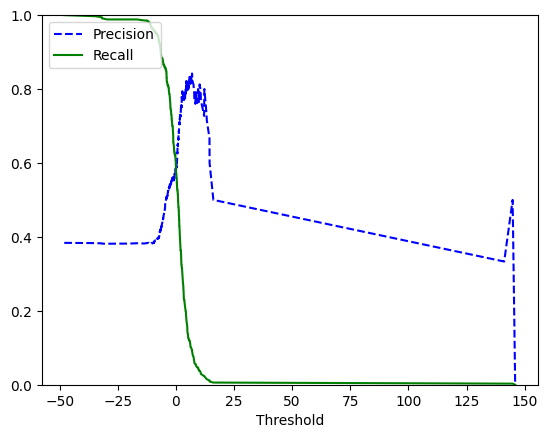

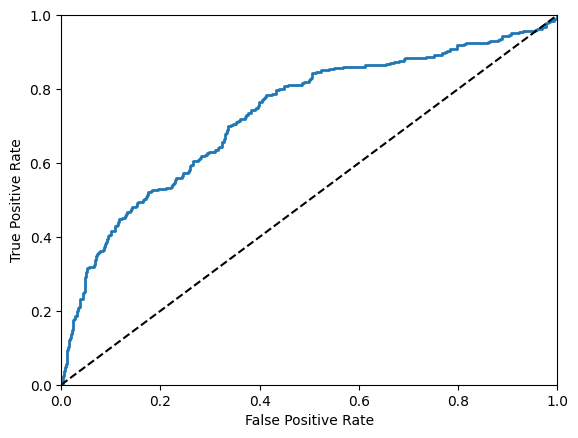

In [13]:
#print the precision, recall and f1 score
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

#plot the precision recall curve
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")    
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()




In [14]:
#repeat all the above steps for a random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
pipeline = Pipeline([("scaler", scaler), ("forest_clf", forest_clf)])
pipeline.fit(X_train, y_train)
y_train_pred = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy")
print(y_train_pred)
print(y_train_pred.mean())


[0.8013468  0.81481481 0.83501684]
0.8170594837261503


0.7934426229508197
0.7076023391812866
0.7480680061823802


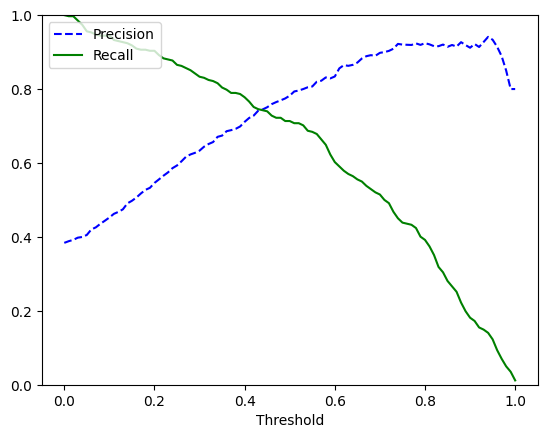

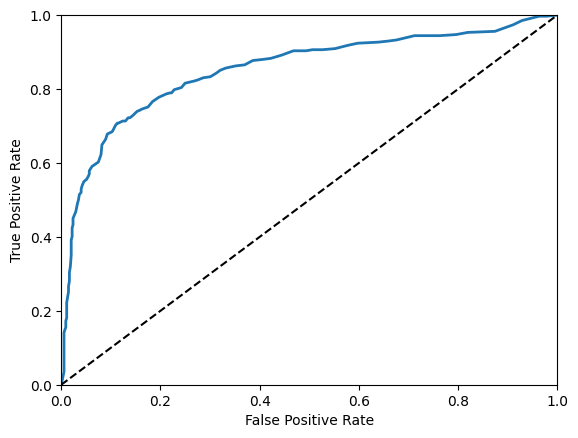

In [15]:
#print the precision, recall and f1 score
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

#plot the precision recall curve
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method="predict_proba")
y_scores = y_scores[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()




In [16]:
#repeat all the above steps for a SVM classifier
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
pipeline = Pipeline([("scaler", scaler), ("svm_clf", svm_clf)])
pipeline.fit(X_train, y_train)
y_train_pred = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy")
print(y_train_pred)
print(y_train_pred.mean())


[0.78114478 0.82828283 0.82154882]
0.8103254769921436


0.7711598746081505
0.7192982456140351
0.7443267776096822


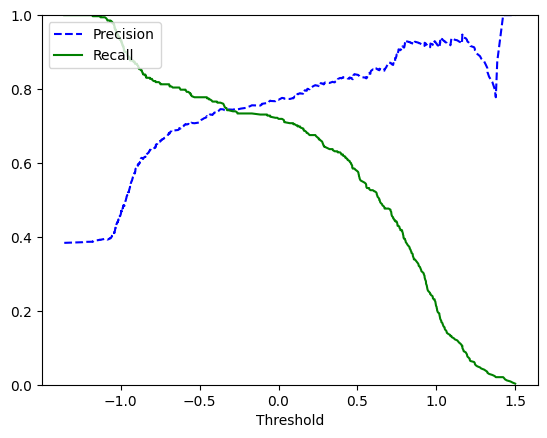

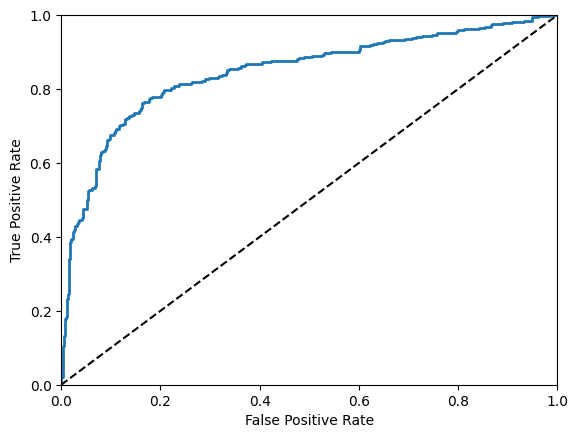

In [17]:
#print the precision, recall and f1 score
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

#plot the precision recall curve
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()





In [18]:
#repeat all the above steps for a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
pipeline = Pipeline([("scaler", scaler), ("knn_clf", knn_clf)])
pipeline.fit(X_train, y_train)
y_train_pred = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy")
print(y_train_pred)
print(y_train_pred.mean())


[0.78114478 0.78451178 0.81481481]
0.7934904601571269


0.7393939393939394
0.7134502923976608
0.726190476190476


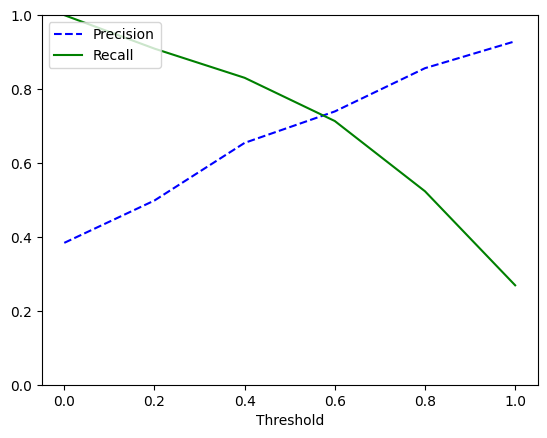

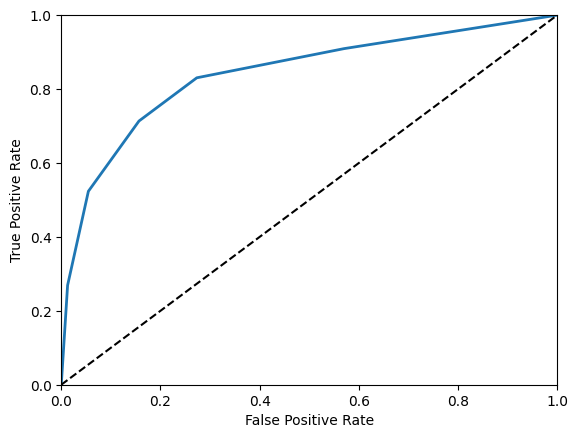

In [19]:
#print the precision, recall and f1 score
y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

#plot the precision recall curve
y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method="predict_proba")
y_scores = y_scores[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()


